# Linear Regression

In [1]:
%load_ext autoreload
%autoreload 2
from si.data import Dataset, summary
from src.si.util.scale import StandardScaler
from si.supervised.LinRegression import LinearRegression,LinearRegressionReg
import numpy as np
import os

In [2]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/lr-example1.data')
dataset = Dataset.from_data(filename, labeled=True)
StandardScaler().fit_transform(dataset,inline=True)
summary(dataset)

,A,Y
mean,3.193322e-16,5.839135
var,1.000000e+00,30.049970
min,-8.137648e-01,-2.680700
max,3.647694e+00,24.147000


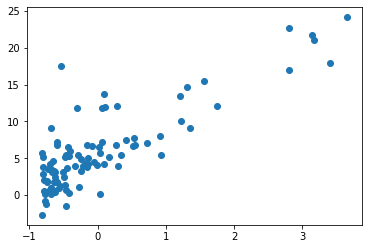

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
if dataset.X.shape[1]==1:
    plt.scatter(dataset.X, dataset.Y)
    plt.show()


## Linear Regression using closed form 

In [4]:
lr = LinearRegression()
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [5.83913505 4.59304113]


In [5]:
idx = 10
x = dataset.X[idx]
print("x = ",x)
y = dataset.Y[idx]
y_pred = lr.predict(x)
print("y_pred = ",y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.9172763535616566
y_true =  3.2522


In [6]:
lr.cost()

4.476971375975178

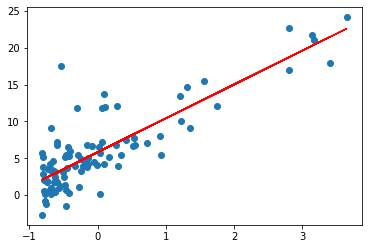

In [7]:
if dataset.X.shape[1] == 1:
    plt.scatter(dataset.X, dataset.Y)
    plt.plot(lr.X[:,1], np.dot(lr.X, lr.theta), '-', color='red')
    plt.show()


## Linear Regression using gradient descent

In [8]:
lr = LinearRegression(gd=True,epochs=50000)
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [5.83913505 4.59304113]


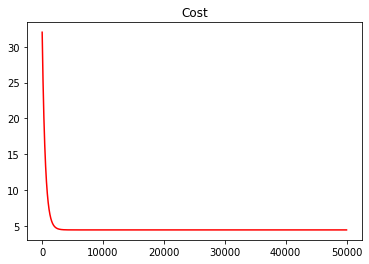

In [9]:
plt.plot(list(lr.history.keys()), [ y[1] for y in lr.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

# Linear Regression with Regularization

In [10]:
lr = LinearRegressionReg()
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [5.83913505 4.54617337]


In [11]:
idx = 10
x = dataset.X[idx]
print("x = ", x)
y = dataset.Y[idx]
y_pred = lr.predict(x)
print("y_pred = ", y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.947091238234969
y_true =  3.2522


# Logistic Regression

In [15]:
from src.si.supervised.LogRegression import LogisticRegression, LogisticRegressionReg
import pandas as pd

In [17]:
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df,ylabel="class")
y = [int(x != 'Iris-setosa') for x in iris.Y]
dataset = Dataset(iris.X[:,:2],np.array(y))
summary(dataset)

,A,B,Y
mean,5.843333,3.054000,0.666667
var,0.681122,0.186751,0.222222
min,4.300000,2.000000,0.000000
max,7.900000,4.400000,1.000000


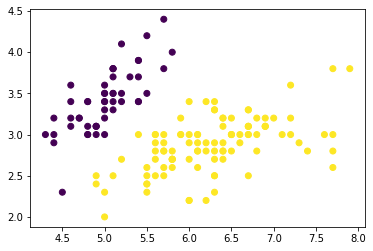

In [19]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.Y)
plt.show()

In [20]:
logreg = LogisticRegression(epochs=20000)

In [16]:
logreg.fit(dataset)
logreg.theta

array([ -4.82595683,   6.87221822, -10.42041025])

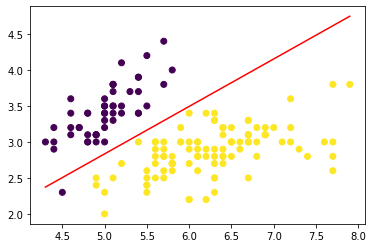

In [17]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

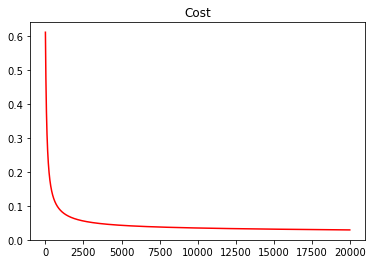

In [18]:
plt.plot(list(logreg.history.keys()), [ y[1] for y in logreg.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

In [19]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1


# Logistic Regression with L2 regularization

In [20]:
logreg = LogisticRegressionReg()
logreg.fit(dataset)
logreg.theta

array([-0.88465655,  2.34501229, -3.72252587])

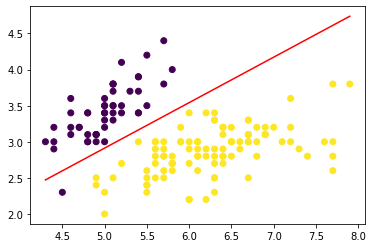

In [21]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

In [22]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1


# Cross-validation

In [23]:
from si.util.cv import CrossValidationScore

In [24]:
logreg = LogisticRegression(epochs=1000)
cv = CrossValidationScore(logreg,dataset,cv=5)
cv.run()
cv.toDataframe()

,Train Scores,Test Scores
0,0.077947,0.104602
1,0.091300,0.069226
2,0.065516,0.169872
3,0.082540,0.099529
4,0.070054,0.138889


In [25]:
logreg = LogisticRegressionReg(epochs=500, lbd=0.5)
cv = CrossValidationScore(logreg, dataset, cv=4)
cv.run()
cv.toDataframe()

,Train Scores,Test Scores
0,0.175962,0.268659
1,0.174419,0.279721
2,0.178894,0.256264
3,0.164381,0.310746


# Grid Search with Cross-Validation

In [26]:
from si.util.cv import GridSearchCV

In [31]:
parameters ={'epochs':[100,200,400,800,1000],'lbd':[0,0.2,0.4,0.6]}
gs = GridSearchCV(logreg, dataset, parameters, cv=3, split=0.8)
gs.run()
df = gs.toDataframe()

In [32]:
df.sort_values(by=['CV_1 train','CV_1 test'])

,epochs,lbd,CV_1 train,CV_1 test,CV_2 train,CV_2 test,CV_3 train,CV_3 test
16,1000,0.0,0.089957,0.073837,0.087457,0.083139,0.082723,0.104220
12,800,0.0,0.104675,0.069143,0.097580,0.094871,0.081422,0.151326
17,1000,0.2,0.117527,0.195598,0.122199,0.177352,0.115399,0.200793
13,800,0.2,0.123826,0.193657,0.111756,0.235957,0.124687,0.199215
18,1000,0.4,0.144526,0.267949,0.145599,0.263016,0.144618,0.268178
8,400,0.0,0.145804,0.160368,0.151073,0.111532,0.154837,0.107870
14,800,0.4,0.151069,0.254449,0.151485,0.249140,0.144943,0.278321
19,1000,0.6,0.155433,0.382003,0.171694,0.311334,0.172473,0.305875
9,400,0.2,0.169764,0.171419,0.144295,0.257840,0.162318,0.192780
15,800,0.6,0.171040,0.311291,0.171123,0.312847,0.167213,0.330959
